In [27]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

training_file = "wildfires_training.csv"
test_file = "wildfires_test.csv"
independent_cols = ["year","temp","humidity","rainfall","drought_code","buildup_index","day","month","wind_speed"]
dependent_col = "fire"

df_training = pd.read_csv(training_file)

X_training = df_training.loc[:,independent_cols]
y_training = df_training.loc[:,dependent_col]
df_test = pd.read_csv(test_file)
X_test = df_test.loc[:,independent_cols]
y_test = df_test.loc[:,dependent_col]

clf = RandomForestClassifier()

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]), 'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35), 'n_estimators': Integer(100, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)
crossover_probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
evolved_estimator_list = []
for crossover_probability in crossover_probabilities:
    evolved_estimator = GASearchCV(estimator=clf,
                                   cv=cv, scoring='accuracy', population_size=6, algorithm='eaMuPlusLambda',
                                   mutation_probability = 0.1, crossover_probability=crossover_probability,
                                   generations=12, param_grid=param_grid, n_jobs=-1, verbose=True, keep_top_k=3,
                                   refit = True)

    evolved_estimator.fit(X_train, y_train)
    evolved_estimator_list.append(evolved_estimator)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	6     	0.900111	0.0417215  	0.9335     	0.810474   
1  	0     	0.931699	0.00402728 	0.9335     	0.922693   
2  	4     	0.934331	0.00126976 	0.936825   	0.9335     
3  	4     	0.934608	0.00123916 	0.936825   	0.9335     
4  	4     	0.938071	0.00328144 	0.942643   	0.935162   
5  	4     	0.939041	0.00361275 	0.942643   	0.935162   
6  	1     	0.941535	0.00247832 	0.942643   	0.935993   
7  	4     	0.942643	0          	0.942643   	0.942643   
8  	1     	0.942643	0          	0.942643   	0.942643   
9  	0     	0.942643	0          	0.942643   	0.942643   
10 	4     	0.942643	0          	0.942643   	0.942643   
11 	1     	0.942643	0          	0.942643   	0.942643   
12 	1     	0.942643	0          	0.942643   	0.942643   
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	6     	0.841507	0.0917206  	0.925187   	0.668329   
1  	4     	0.907038	0.0248471  	0.92685    	0.871987   
2  	3     	0.923109	0.00207814 	0.925187   	0.92

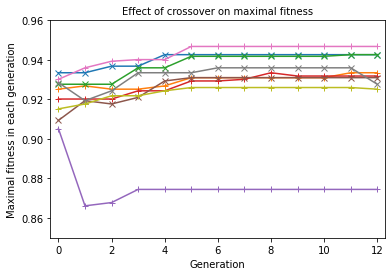

In [50]:
generation_indexes = list(range(0, 13))
plt.plot(generation_indexes,evolved_estimator_list[0].history['fitness_max'],marker="x")
plt.plot(generation_indexes,evolved_estimator_list[1].history['fitness_max'],marker="+")
plt.plot(generation_indexes,evolved_estimator_list[2].history['fitness_max'],marker="x")
plt.plot(generation_indexes,evolved_estimator_list[3].history['fitness_max'],marker="+")
plt.plot(generation_indexes,evolved_estimator_list[4].history['fitness_max'],marker="+")
plt.plot(generation_indexes,evolved_estimator_list[5].history['fitness_max'],marker="x")
plt.plot(generation_indexes,evolved_estimator_list[6].history['fitness_max'],marker="+")
plt.plot(generation_indexes,evolved_estimator_list[7].history['fitness_max'],marker="x")
plt.plot(generation_indexes,evolved_estimator_list[8].history['fitness_max'],marker="+")
plt.xlim([-0.3, 12.3])
plt.ylim([0.85, 0.96])
plt.xlabel("Generation")
plt.ylabel("Maximal fitness in each generation")
#legend_labels = ["Cross = 0.1", "Cross = 0.2", "Cross = 0.3", "Cross = 0.4", "Cross = 0.5", "Cross = 0.6", "Cross = 0.7", "Cross = 0.8", "Cross = 0.9"]
#plt.legend(frameon=False, labels=legend_labels, loc=4, borderpad=1)
plt.title("Effect of crossover on maximal fitness", fontsize=10)
plt.show()

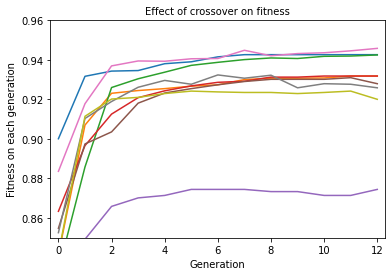

In [53]:
generation_indexes = list(range(0, 13))
plt.plot(generation_indexes,evolved_estimator_list[0].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list[1].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list[2].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list[3].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list[4].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list[5].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list[6].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list[7].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list[8].history['fitness'])
plt.xlim([-0.3, 12.3])
plt.ylim([0.85, 0.96])
plt.xlabel("Generation")
plt.ylabel("Fitness on each generation")
legend_labels = ["Cross = 0.1", "Cross = 0.2", "Cross = 0.3", "Cross = 0.4", "Cross = 0.5", "Cross = 0.6", "Cross = 0.7", "Cross = 0.8", "Cross = 0.9"]
#plt.legend(frameon=False, labels=legend_labels, loc=4, borderpad=1, ncol=3)
plt.title("Effect of crossover on fitness", fontsize=10)
plt.show()

In [47]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_digits()
n_samples = len(data.images)
X = data.images.reshape((n_samples, -1))
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier()

param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(1, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(10, 300)}

cv = StratifiedKFold(n_splits=3, shuffle=True)
mutation_probability_list=[0.01, 0.05, 0.1, 0.15, 0.2, 0.3]
evolved_estimator_list_mutation = []
for mutation_probability in mutation_probability_list:
    evolved_estimator = GASearchCV(estimator=clf,
                                   cv=cv,
                                   scoring='accuracy',
                                   population_size=6,
                                   algorithm='eaMuCommaLambda',
                                   mutation_probability = mutation_probability,
                                   crossover_probability= 0.7,
                                   generations=12,
                                   param_grid=param_grid,
                                   n_jobs=-1,
                                   verbose=True,
                                   keep_top_k=4,
                                   refit = True)

    # Train and optimize the estimator
    evolved_estimator.fit(X_train, y_train)
    evolved_estimator_list_mutation.append(evolved_estimator)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	6     	0.843863	0.0573092  	0.921862   	0.744805   
1  	9     	0.896093	0.0089914  	0.901081   	0.876143   
2  	9     	0.906068	0.00865198 	0.914381   	0.893599   
3  	7     	0.90967 	0.00788111 	0.921862   	0.898587   
4  	8     	0.915905	0.00111697 	0.916874   	0.914381   
5  	7     	0.916736	0.00205958 	0.919368   	0.914381   
6  	10    	0.918676	0.00241954 	0.921031   	0.915212   
7  	10    	0.921169	0.00408407 	0.928512   	0.916043   
8  	9     	0.919368	0.00185874 	0.921862   	0.916874   
9  	6     	0.918814	0.00149215 	0.9202     	0.916874   
10 	11    	0.919645	0.000918987	0.9202     	0.917706   
11 	8     	0.918814	0.00309791 	0.9202     	0.911887   
12 	9     	0.916874	0.00332502 	0.9202     	0.913549   
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	6     	0.842893	0.0719792  	0.906068   	0.694098   
1  	10    	0.903436	0.0093606  	0.915212   	0.891937   
2  	11    	0.919922	0.0178392  	0.938487   	0.89

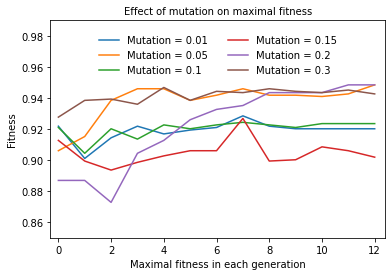

In [60]:
import matplotlib.pyplot as plt
generation_indexes = list(range(0, 13))
plt.plot(generation_indexes,evolved_estimator_list_mutation[0].history['fitness_max'])
plt.plot(generation_indexes,evolved_estimator_list_mutation[1].history['fitness_max'])
plt.plot(generation_indexes,evolved_estimator_list_mutation[2].history['fitness_max'])
plt.plot(generation_indexes,evolved_estimator_list_mutation[3].history['fitness_max'])
plt.plot(generation_indexes,evolved_estimator_list_mutation[4].history['fitness_max'])
plt.plot(generation_indexes,evolved_estimator_list_mutation[5].history['fitness_max'])
plt.xlim([-0.3, 12.4])
plt.ylim([0.85, 0.99])
plt.xlabel("Maximal fitness in each generation")
plt.ylabel("Fitness")
legend_labels = ["Mutation = 0.01", "Mutation = 0.05", "Mutation = 0.1", "Mutation = 0.15", "Mutation = 0.2", "Mutation = 0.3"]
plt.legend(frameon=False, labels=legend_labels, loc='upper center', borderpad=1, ncol=2)
plt.title("Effect of mutation on maximal fitness", fontsize=10)
plt.show()

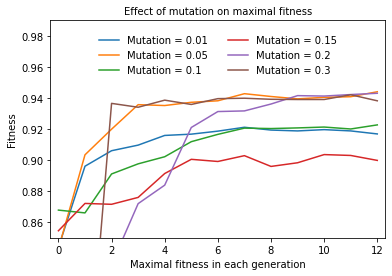

In [61]:
import matplotlib.pyplot as plt
generation_indexes = list(range(0, 13))
plt.plot(generation_indexes,evolved_estimator_list_mutation[0].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list_mutation[1].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list_mutation[2].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list_mutation[3].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list_mutation[4].history['fitness'])
plt.plot(generation_indexes,evolved_estimator_list_mutation[5].history['fitness'])
plt.xlim([-0.3, 12.3])
plt.ylim([0.85, 0.99])
plt.xlabel("Maximal fitness in each generation")
plt.ylabel("Fitness")
legend_labels = ["Mutation = 0.01", "Mutation = 0.05", "Mutation = 0.1", "Mutation = 0.15", "Mutation = 0.2", "Mutation = 0.3"]
plt.legend(frameon=False, labels=legend_labels, loc='upper center', borderpad=1, ncol=2)
plt.title("Effect of mutation on maximal fitness", fontsize=10)
plt.show()